In [17]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [18]:
# reading the data
df =pd.read_csv("C:/heart.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [19]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.groupby('cp',as_index=True)['target'].mean()

cp
0    0.272727
1    0.820000
2    0.793103
3    0.695652
Name: target, dtype: float64

In [6]:
df.groupby('slope',as_index=False)['target'].mean()

slope    target
0      0  0.428571
1      1  0.350000
2      2  0.753521

In [7]:
df.groupby('thal',as_index=False)['target'].mean()

thal    target
0     0  0.500000
1     1  0.333333
2     2  0.783133
3     3  0.239316

In [8]:
df.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212

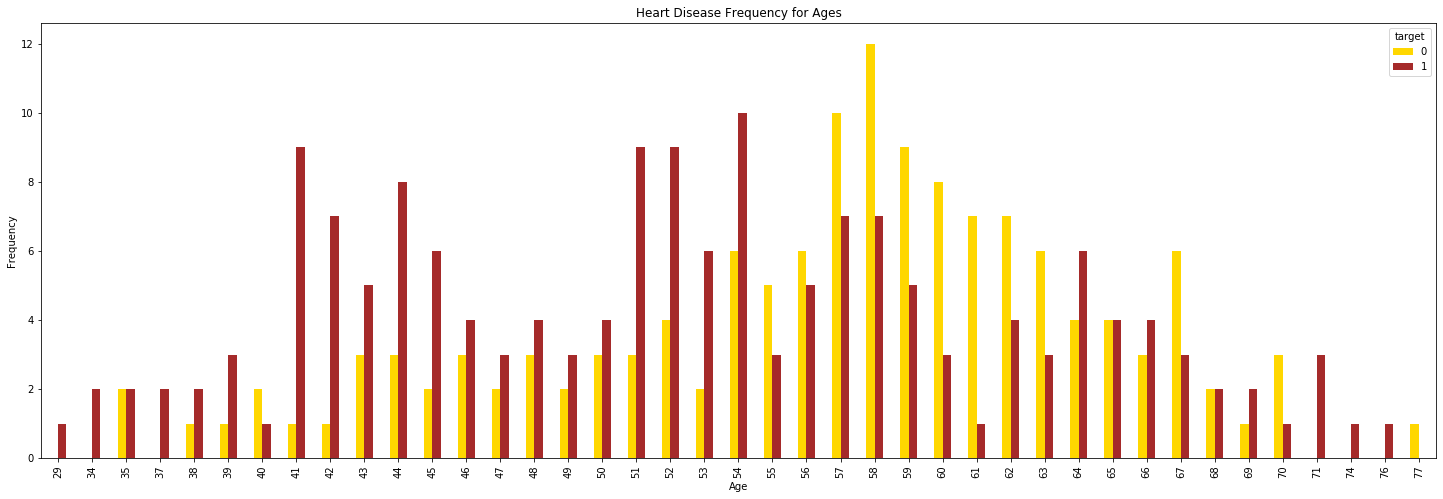

In [9]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])

plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

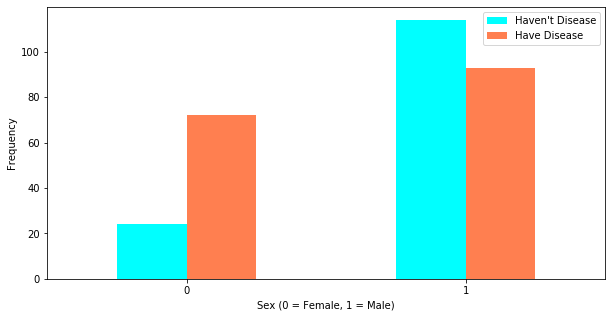

In [10]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Relation of tresbps with target')

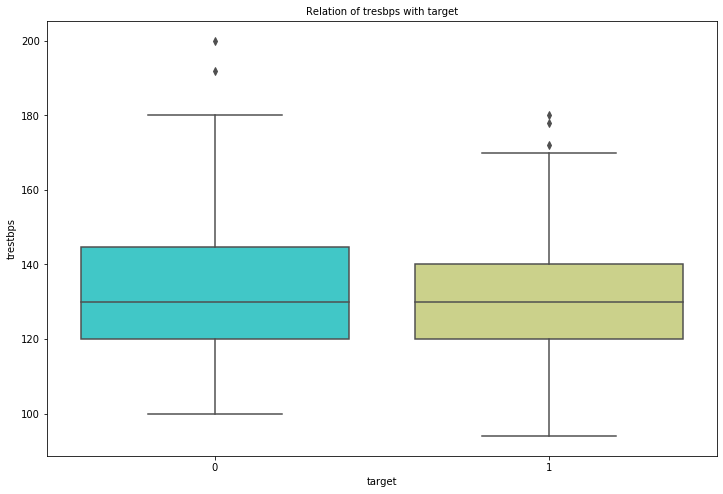

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(df['target'], df['trestbps'], palette = 'rainbow')
plt.title('Relation of tresbps with target', fontsize = 10)

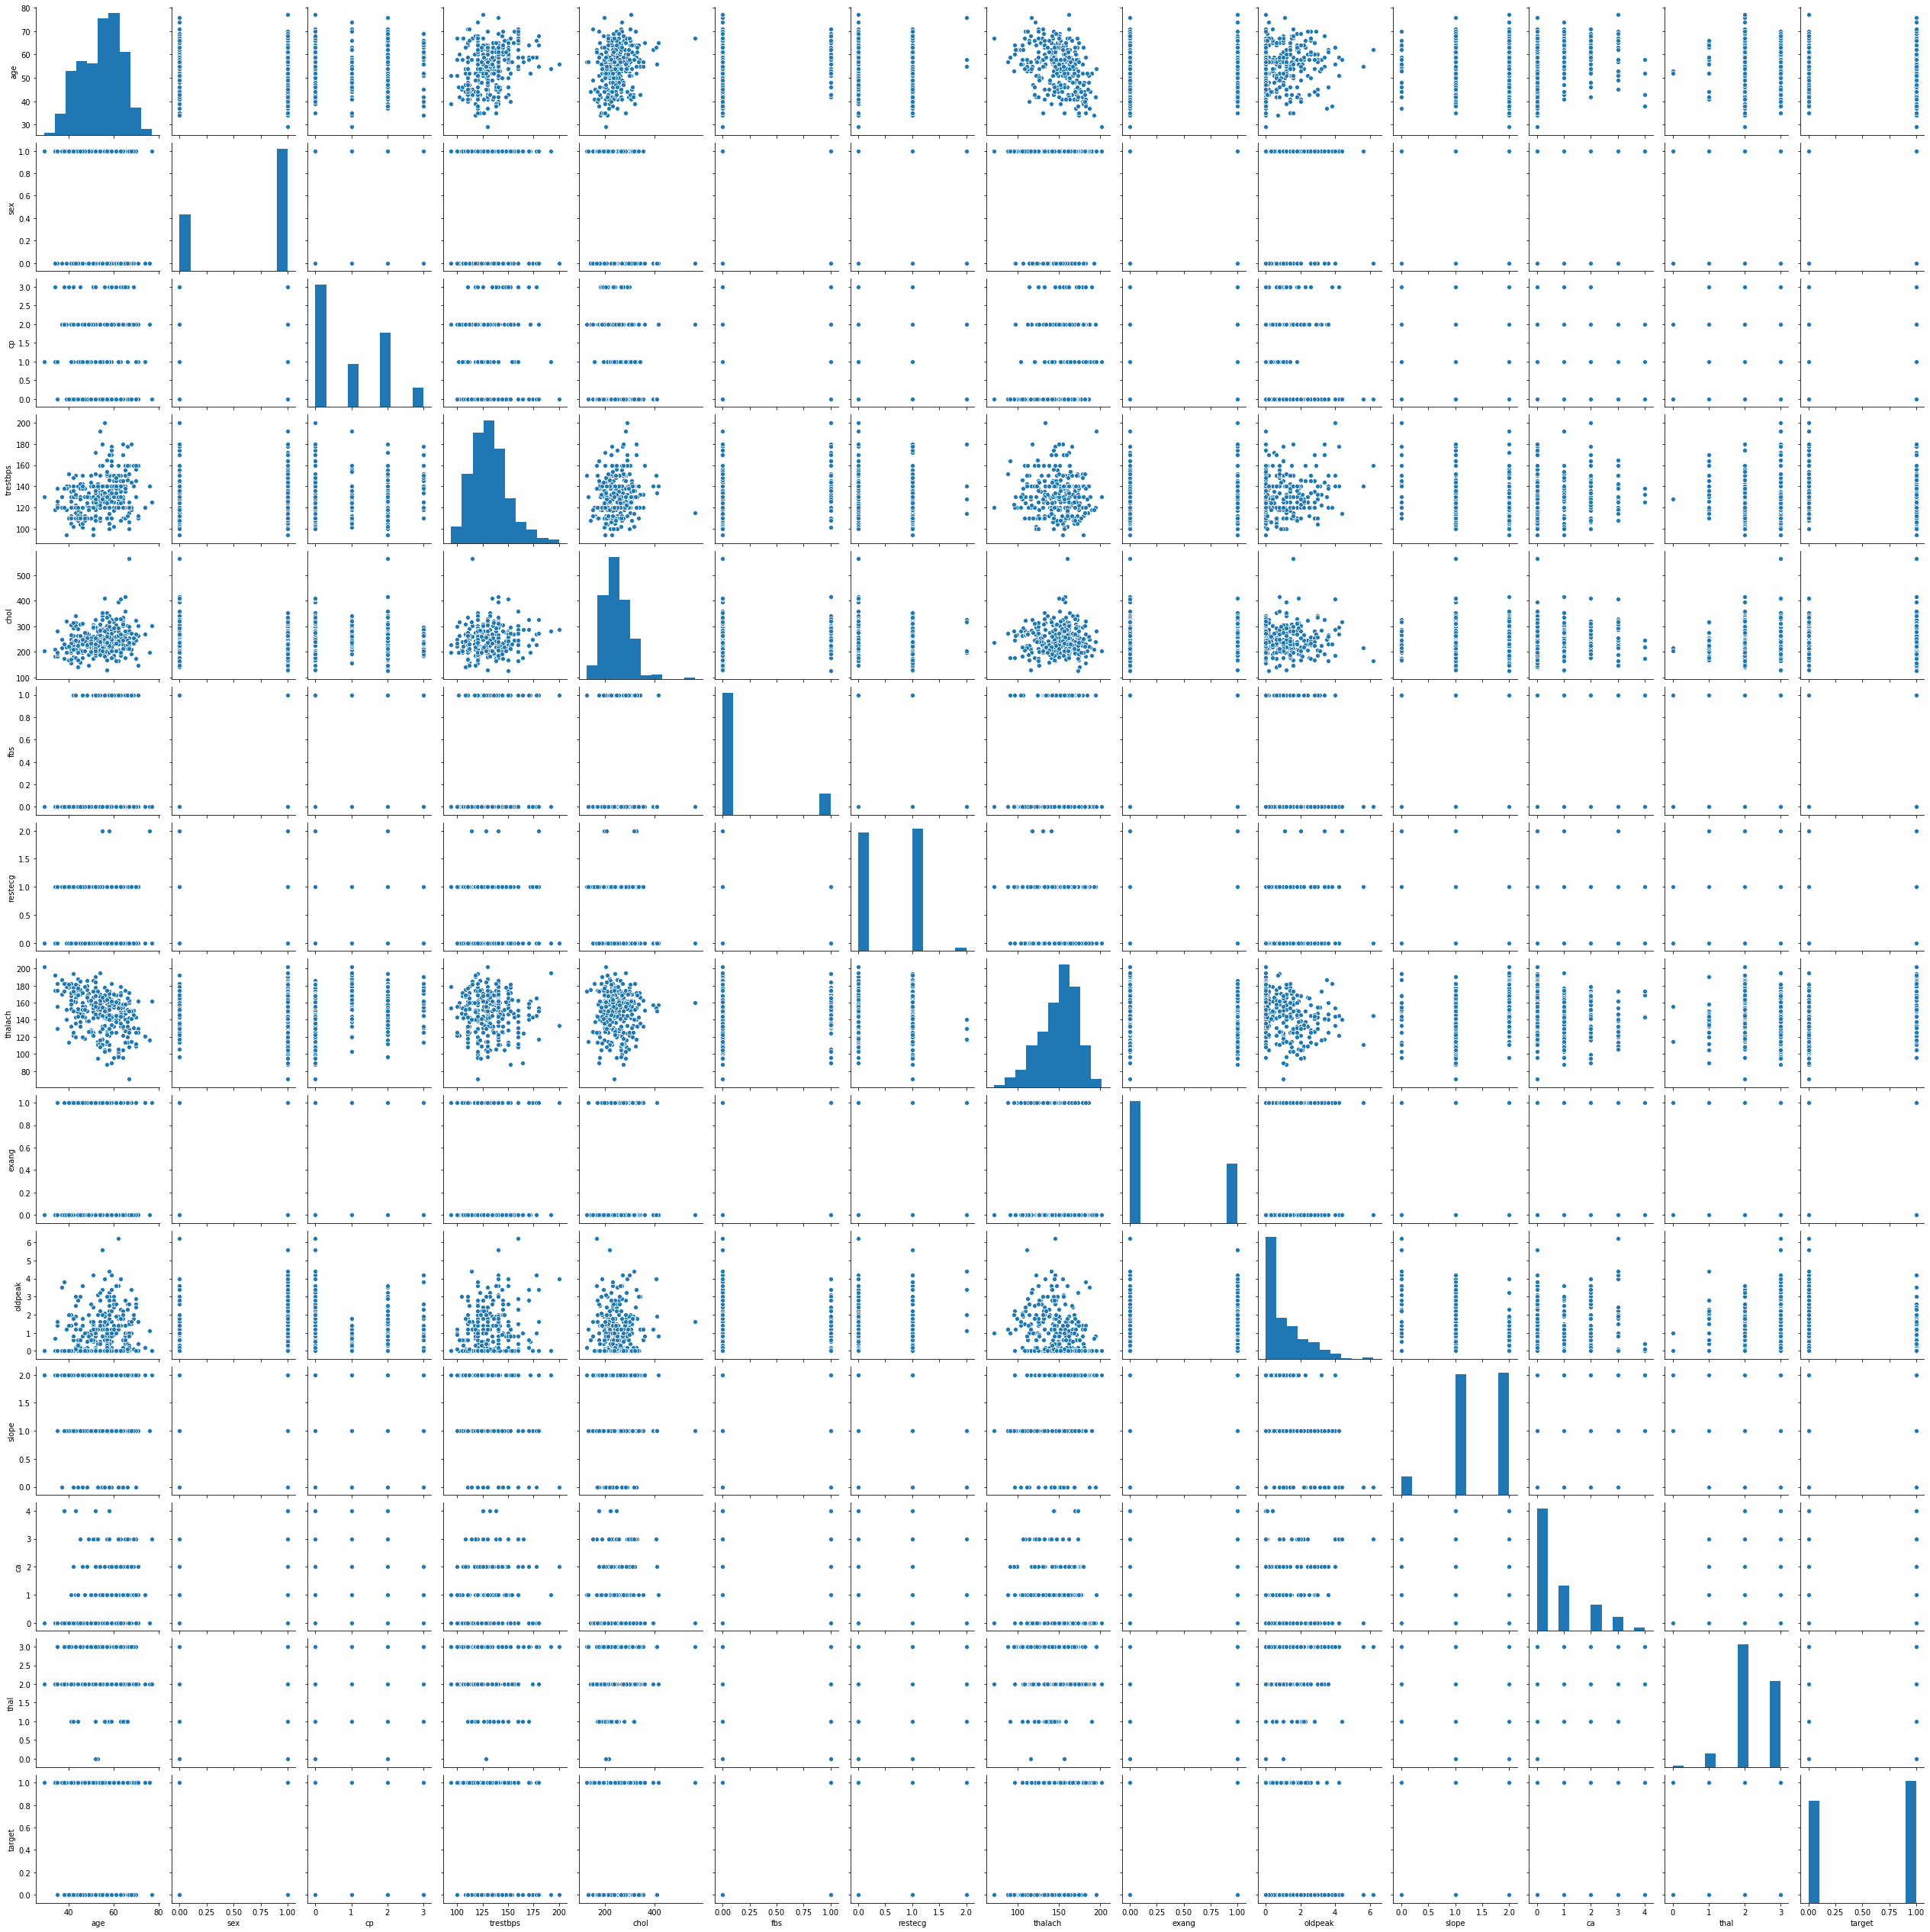

In [12]:
sns.pairplot(data=df)

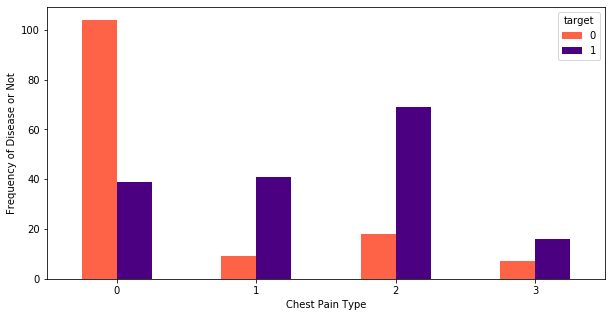

In [13]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [31]:
df = df.rename(columns ={'Age (age in year)' : 'Age', 'cholestoral ': 'ch'})

# Effect of parameters on Heart Disease based on Age

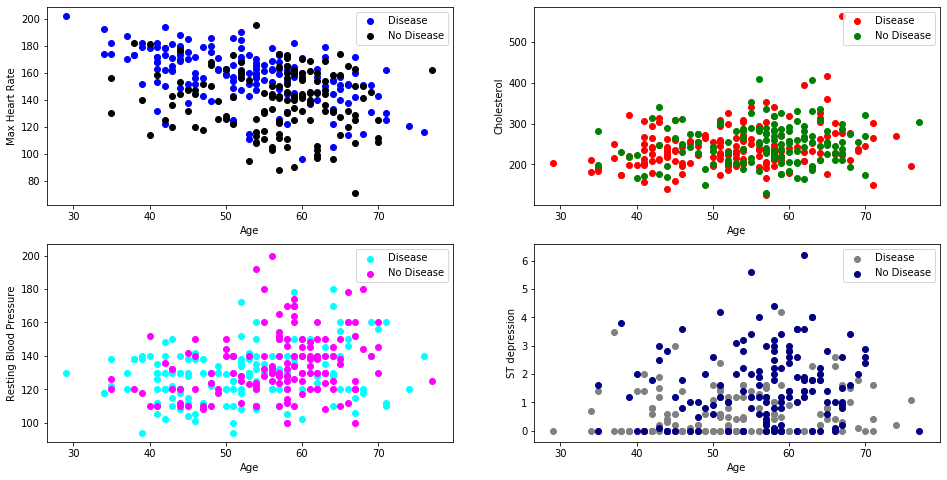

In [14]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)

plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],c='blue')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],c='black')

plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=df.age[df.target==1],y=df.chol[df.target==1],c='red')
plt.scatter(x=df.age[df.target==0],y=df.chol[df.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=df.age[df.target==1],y=df.trestbps[df.target==1],c='cyan')
plt.scatter(x=df.age[df.target==0],y=df.trestbps[df.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.oldpeak[df.target==1],c='grey')
plt.scatter(x=df.age[df.target==0],y=df.oldpeak[df.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()

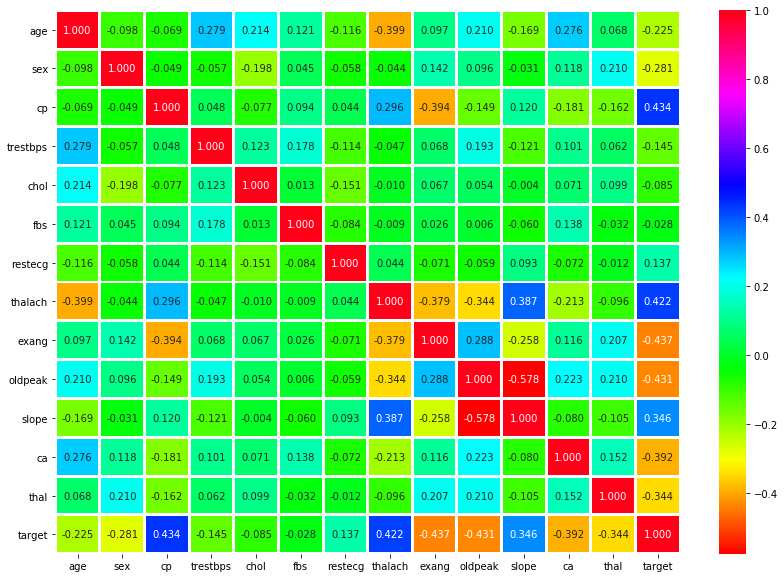

In [15]:
plt.figure(figsize=(14,10))
df.corr()
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df_corr=df.corr()['target'][:-1]
feature_list=df_corr[df_corr>0.1].sort_values(ascending=False)
feature_list

cp         0.433798
thalach    0.421741
slope      0.345877
restecg    0.137230
Name: target, dtype: float64

In [20]:
!python -m pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=a6eaae3362643baa826bce9de3ce81b8600f512ee7a7883ed2f591a79f4434fb
  Stored in directory: c:\users\amirr\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [4]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

col='sex'

d1=df[df['target']==0]
d2=df[df['target']==1]

v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)

v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

trace1 = go.Bar(x=v1[col], y=v1["count"], name=0, marker=dict(color="#a678de"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name=1, marker=dict(color="#6ad49b"))
data = [trace1, trace2]

layout={'title':"target over the sex(male or female)",'xaxis':{'title':"target"}}

#layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
iplot(fig)

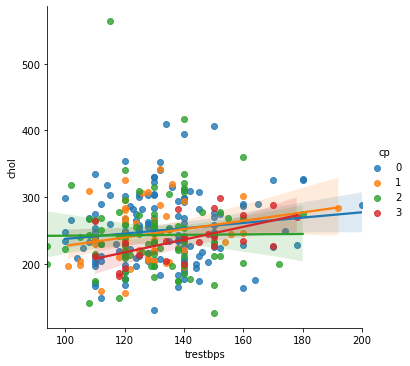

In [8]:
sns.lmplot(x="trestbps", y="chol",data=df,hue="cp")
# plt.show()

In [3]:
# Creating Dummy Variables
chest_pain = pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df

df.drop(['cp'],axis=1,inplace=True)

In [4]:
sp = pd.get_dummies(df['slope'],prefix='slope', drop_first=True)
th = pd.get_dummies(df['thal'],prefix='thal', drop_first=True)
frames=[df,sp,th]
df=pd.concat(frames,axis=1)
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'cp_1', 'cp_2', 'cp_3',
       'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [5]:
df.drop(['slope','thal'],axis=1,inplace=True)

In [7]:
df.head(5)

age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  \
0   63    1       145   233    1        0      150      0      2.3   0   
1   37    1       130   250    0        1      187      0      3.5   0   
2   41    0       130   204    0        0      172      0      1.4   0   
3   56    1       120   236    0        1      178      0      0.8   0   
4   57    0       120   354    0        1      163      1      0.6   0   

   target  cp_1  cp_2  cp_3  slope_1  slope_2  thal_1  thal_2  thal_3  
0       1     0     0     1        0        0       1       0       0  
1       1     0     1     0        0        0       0       1       0  
2       1     1     0     0        0        1       0       1       0  
3       1     1     0     0        0        1       0       1       0  
4       1     0     0     0        0        1       0       1       0

In [8]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train, y_train)
X_test = sc.transform(X_test)

In [11]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)

#SVM linear classifier
svc_c=SVC(kernel='linear',random_state=0)
svc_c.fit(X_train,y_train)
svc_pred=svc_c.predict(X_test)
sv_cm=confusion_matrix(y_test,svc_pred)
sv_ac=accuracy_score(y_test, svc_pred)

#Bayes
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
bayes_pred=gaussian.predict(X_test)
bayes_cm=confusion_matrix(y_test,bayes_pred)
bayes_ac=accuracy_score(bayes_pred,y_test)

#SVM rbf classifier
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac=accuracy_score(knn_pred,y_test)

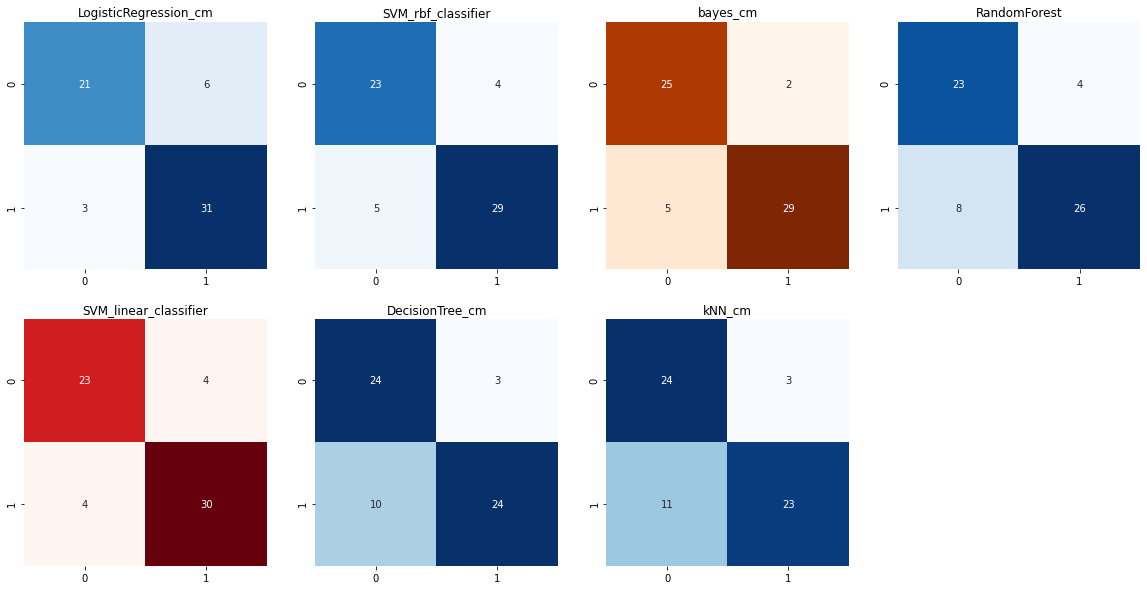

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,4,2)
plt.title("SVM_rbf_classifier")
sns.heatmap(sv_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,4,3)
plt.title("bayes_cm")
sns.heatmap(bayes_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)

plt.subplot(2,4,4)
plt.title("RandomForest")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,4,5)
plt.title("SVM_linear_classifier")
sns.heatmap(svr_cm,annot=True,cmap="Reds",fmt="d",cbar=False)

plt.subplot(2,4,6)
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,4,7)
plt.title("kNN_cm")
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [13]:
print('LogisticRegression_accuracy:\t',lr_ac)
print('SVM_rbf_accuracy:\t\t',svr_ac)
print('RandomForest_accuracy:\t\t',rdf_ac)
print('DecisionTree_accuracy:\t\t',dtree_ac)
print('KNN_accuracy:\t\t\t',knn_ac)
print('SVM_classifier_accuracy:\t',sv_ac)
print('Bayes_accuracy:\t\t\t',bayes_ac)

LogisticRegression_accuracy:	 0.8524590163934426
SVM_rbf_accuracy:		 0.8688524590163934
RandomForest_accuracy:		 0.8032786885245902
DecisionTree_accuracy:		 0.7868852459016393
KNN_accuracy:			 0.7704918032786885
SVM_classifier_accuracy:	 0.8524590163934426
Bayes_accuracy:			 0.8852459016393442


In [14]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

<Figure size 432x288 with 0 Axes>

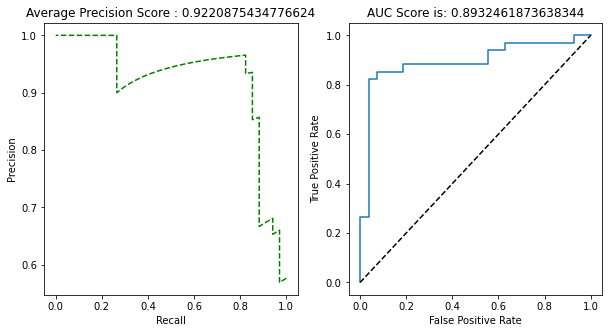

In [15]:
plt.figure()
plotting(y_test,gaussian.predict_proba(X_test))

Text(0.5, 1.0, 'Model Accracy')

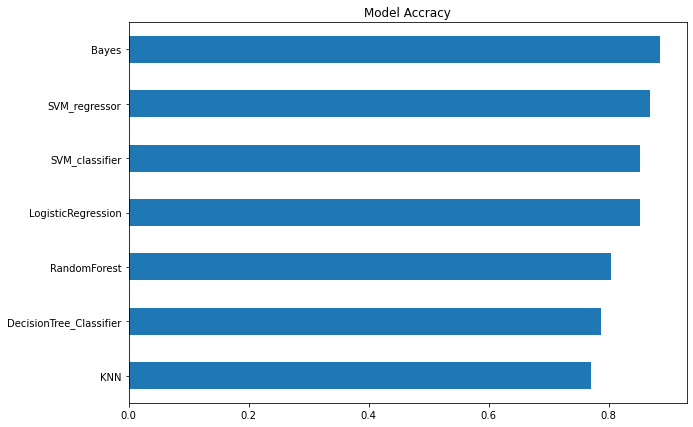

In [16]:
model_accuracy = pd.Series(data=[lr_ac,sv_ac,bayes_ac,svr_ac,rdf_ac,dtree_ac,knn_ac], 
                index=['LogisticRegression','SVM_classifier','Bayes','SVM_regressor',
                                      'RandomForest','DecisionTree_Classifier','KNN'])
fig= plt.figure(figsize=(10,7))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')